In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [29]:
#reading csv file
train_data = pd.read_csv(r'C:\Users\Dell\Documents\Akshada\Data\train.csv') #train_file
test_data = pd.read_csv(r'C:\Users\Dell\Documents\Akshada\Data\test.csv')

In [30]:
#convert categorical data into numeric
train_data['times_of_day'].replace(['Evening', 'Morning', 'Noon'],
                        [0, 1,2], inplace=True)
test_data['times_of_day'].replace(['Evening', 'Morning', 'Noon'],
                        [0, 1,2], inplace=True)
    

In [31]:
#Check if any column contains unique value
for col in train_data.columns[1:]:
    if len(train_data[col].unique())==1:
        print("Column: {c}, Unique value:{s}".format(c = col, s = train_data[col].unique()))

Column: is_timer, Unique value:[0]


In [32]:
#Check if any missing values present in data
for col in train_data.columns[1:]:
    if train_data[col].isnull().sum():
        print("Column: {c} No of NaN:{s}".format(c = col, s = train_data[col].isnull().sum()))

In [33]:
#check if any duplicate records present
train_data.duplicated().sum()

0

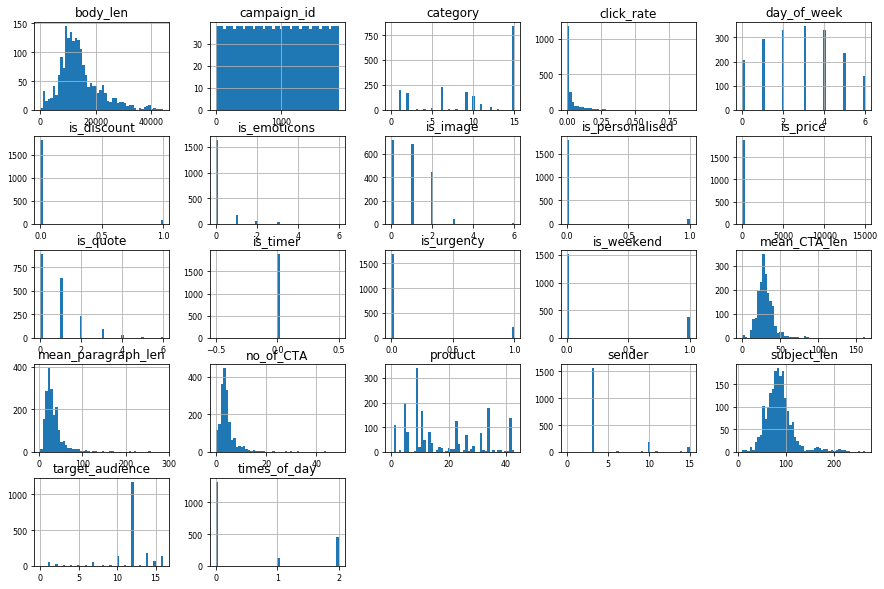

In [34]:
train_data.hist(figsize=(15, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [35]:
#contains only one value, it may not influence the output variable
train_data.drop(['is_timer'],inplace=True,axis=1)
train_data.drop(['is_price'],inplace=True,axis=1)
test_data.drop(['is_price'],inplace=True,axis=1)
test_data.drop(['is_timer'],inplace=True,axis=1)

In [36]:
train_data.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,0.539195,9.949682,17.525424,4.222458,30.233051,0.909958,0.056674,0.834216,0.210805,0.039725,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,0.849920,5.300719,12.369526,4.628348,11.848663,0.866467,0.231279,1.033901,0.613442,0.195363,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,0.000000,6.000000,9.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,0.000000,10.000000,12.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,1.000000,15.000000,27.250000,5.000000,35.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,2.000000,15.000000,43.000000,49.000000,162.000000,6.000000,1.000000,6.000000,6.000000,1.000000,1.000000,16.000000,0.897959


(array([1.642e+03, 1.400e+02, 5.500e+01, 1.800e+01, 1.200e+01, 1.200e+01,
        2.000e+00, 6.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.08979592, 0.17959184, 0.26938776, 0.35918367,
        0.44897959, 0.53877551, 0.62857143, 0.71836735, 0.80816327,
        0.89795918]),
 <a list of 10 Patch objects>)

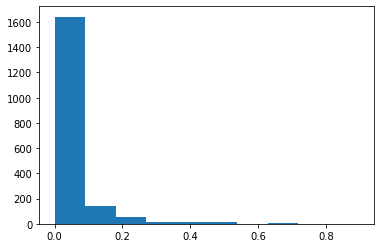

In [37]:
# data visualization

plt.hist(train_data['click_rate'])

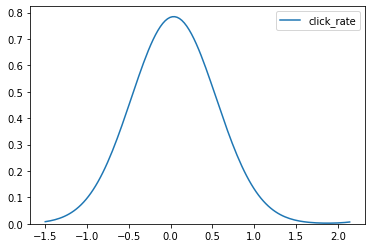

In [23]:
train_data['click_rate'] = np.log(train_data['click_rate']+1)
plt.hist()

In [24]:

X = train_data.iloc[:,1:len(train_data.columns)-1]
y = train_data.iloc[:,-1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
X_test = test_data.iloc[:,1:]



In [26]:
rf_model = rf(n_estimators=500,random_state=0)
rf_model.fit(X,y)
y_pred =rf_model.predict(X_train) 
print("R_squared for random forest, training data: ",r2_score(y_train, y_pred))
y_pred_ =rf_model.predict(X_valid) 
print("R_squared for random forest, testing data: ",r2_score(y_valid, y_pred_))

R_squared for random forest, training data:  0.9418426697680451
R_squared for random forest, testing data:  0.942295548984739


In [331]:
submission = pd.DataFrame(columns=['campaign_id','click_rate'])
submission['campaign_id'] =test_data['campaign_id']
submission['click_rate'] = y_test_pred

In [332]:
submission.to_csv(r'C:\Users\Dell\Documents\Akshada\Data\submission.csv',index=False)

(array([1.287e+03, 1.330e+02, 7.100e+01, 2.800e+01, 1.100e+01, 9.000e+00,
        1.000e+01, 5.000e+00, 1.000e+00, 4.000e+00]),
 array([0.        , 0.06925208, 0.13850416, 0.20775623, 0.27700831,
        0.34626039, 0.41551247, 0.48476454, 0.55401662, 0.6232687 ,
        0.69252078]),
 <a list of 10 Patch objects>)

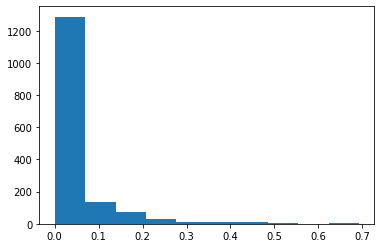

In [33]:
#_, p = stats.normaltest(data['click_rate'])
#print(p)

0.0


In [333]:
check = pd.read_csv(r'C:\Users\Dell\Documents\Akshada\Data\sample_submission_LJ2N3ZQ.csv') #train_file

r2_score(check['y_true'], check['y_pred'])

0.0